# EDA, Preprocessing, Models, Test
_Author: Ana Petronijevic

---

### Executive Summary
- Additional EDA on outlier data per [Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
- Correlation matrix on entire set and graphical representation of data, including a linear regression describing the relationship between Sales Price and a particularly strongly correlated variable.
- Additional graphs specific for categorical data,
- Seperated Neighborhoods Series into dummy columns inorder to represent a categorical data numerically, and be able to utilize it in models.
- Train test split based on features selected, which were described in the EDA.
- Interpreting MSE, intercept, and coef scores
- Imported testing set and cleaned the data the same way as the training set
- Created predictions based on the features selected in the training set.

1.)Importing libraries
2.)Reading in the data
3.) Extending rows and columns in order to be able to see all

In [77]:
#1.)
import pandas as pd
import numpy as np
import pandas_profiling as pdp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

#2
ames = pd.read_csv("./datasets/trained_cleaned.csv")

#3
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Creating a copy of the imported data

In [2]:
ames2 = ames.copy()

In [3]:
ames2.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,No_FP,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,No_Pool,No_Fence,No_Misc,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,No_Pool,No_Fence,No_Misc,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,No_FP,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,No_Pool,No_Fence,No_Misc,0,1,2010,WD,109000


Double checking that my missing values are not reading as missing values again

In [4]:
ames2.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

Gives me a True or False statement if I have any missing values.

In [5]:
ames2.isnull().values.any()

False

In [ ]:
print(ames2['SalePrice'].max())
print(ames2['SalePrice'].min())
#specifically calling on the predictor column to see the max and min, where we can see some outliers.
#the min seems very low.

Per the data description, I am droping any houses with more than 4000 sqft

"I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students."

I am doing this here instead of in the cleaning folder incase I want to come back and include outliers for a specific reason.

In [6]:
ames2.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,57.944417,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1868.725987,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,33.137332,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,454.133654,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,43.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,63.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
ames2 = ames2[ames2['Gr Liv Area'] < 4000] 

In [8]:
ames2.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175478,0.026905,-0.014749,0.031633,-0.062876,-0.025888,-0.065010,-0.090613,-0.039066,-0.051540,0.000868,0.008181,-0.044247,-0.028082,-0.008099,0.011767,-0.027771,-0.033906,0.012924,-0.059439,-0.042625,0.011025,-0.002313,-0.011511,-0.038705,-0.038953,-0.050315,-0.047804,-0.010533,-0.001364,0.033915,-0.022751,0.009882,0.057847,-0.032705,0.127381,-0.975765,-0.051416
PID,0.175478,1.000000,-0.003235,-0.044055,0.018315,-0.269728,0.107443,-0.348677,-0.178039,-0.251441,-0.101313,-0.012998,-0.112402,-0.226646,-0.162620,-0.005949,0.072415,-0.124491,-0.033509,-0.003958,-0.180291,-0.165453,0.009548,0.068659,-0.090557,-0.124367,-0.153626,-0.230408,-0.207081,-0.043626,-0.087519,0.150647,-0.024588,-0.041763,-0.000529,-0.014021,-0.032532,0.008693,-0.255068
MS SubClass,0.026905,-0.003235,1.000000,-0.219101,-0.249039,0.036962,-0.070360,0.036482,0.045333,-0.000179,-0.060378,-0.068257,-0.138867,-0.233426,-0.253614,0.305655,0.031055,0.073151,0.026158,-0.015507,0.142453,0.180062,-0.003955,0.252083,0.037081,-0.054580,-0.110765,-0.048802,-0.108031,0.003084,-0.017906,-0.039998,-0.030133,-0.038940,-0.005250,-0.019830,0.013693,-0.033134,-0.087331
Lot Frontage,-0.014749,-0.044055,-0.219101,1.000000,0.104860,0.103401,-0.030496,0.015057,0.054358,0.082413,0.006790,0.002757,0.149370,0.163828,0.198959,-0.019958,0.012195,0.139049,-0.002638,-0.022210,0.052188,-0.037649,0.099377,0.016314,0.170448,0.022557,0.001119,0.117418,0.157692,0.004322,0.077032,0.011190,0.008705,0.038583,0.047466,-0.005564,-0.000672,0.007805,0.185351
Lot Area,0.031633,0.018315,-0.249039,0.104860,1.000000,0.091621,-0.016461,0.029388,0.044804,0.143165,0.166319,0.044453,0.040815,0.231147,0.348123,0.025898,0.001962,0.294542,0.101550,0.022797,0.123522,0.043360,0.143438,-0.012509,0.219947,0.276997,0.085989,0.214817,0.246172,0.148014,0.116701,0.016749,0.020589,0.070890,0.070138,0.042710,0.007863,-0.029471,0.303744
Overall Qual,-0.062876,-0.269728,0.036962,0.103401,0.091621,1.000000,-0.081723,0.602376,0.584080,0.423650,0.267342,-0.027300,0.276291,0.553066,0.474783,0.228222,-0.052241,0.564933,0.171483,-0.051991,0.515052,0.272717,0.054692,-0.171044,0.375268,0.384147,0.276983,0.587441,0.559897,0.252890,0.300504,-0.154120,0.032329,0.049701,-0.010643,-0.022692,0.020040,-0.011060,0.803462
Overall Cond,-0.025888,0.107443,-0.070360,-0.030496,-0.016461,-0.081723,1.000000,-0.370699,0.043223,-0.131186,-0.043670,0.047469,-0.131055,-0.163313,-0.153064,0.011091,0.004700,-0.109227,-0.039189,0.101137,-0.218898,-0.092725,-0.010119,-0.095841,-0.092308,-0.005001,0.016163,-0.168393,-0.137299,0.012182,-0.050434,0.108153,0.026860,0.047224,-0.002792,0.028513,-0.003279,0.047570,-0.097093
Year Built,-0.065010,-0.348677,0.036482,0.015057,0.029388,0.602376,-0.370699,1.000000,0.628613,0.319393,0.277738,-0.020580,0.136708,0.420818,0.326977,0.021942,-0.159390,0.257605,0.213866,-0.033475,0.479743,0.282149,-0.041701,-0.127014,0.133968,0.166231,0.274820,0.542936,0.487414,0.214571,0.204778,-0.379934,0.016237,-0.037556,-0.003811,-0.022036,-0.006789,-0.003315,0.572405
Year Remod/Add,-0.090613,-0.178039,0.045333,0.054358,0.044804,0.584080,0.043223,0.628613,1.000000,0.201290,0.164397,-0.056606,0.160526,0.314926,0.244551,0.159455,-0.066499,0.323532,0.151956,-0.039930,0.471130,0.223007,-0.019283,-0.135787,0.199492,0.136227,0.164182,0.439853,0.396578,0.214563,0.262480,-0.237269,0.040559,-0.040914,-0.030567,-0.024675,0.011850,0.043023,0.550872
Mas Vnr Area,-0.039066,-0.251441,-0.000179,0.082413,0.143165,0.423650,-0.131186,0.319393,0.201290,1.000000,0.289811,-0.014062,0.0813

Because the Neighborhood columns are categorical, before I dummy them I wanted to compare the neighborhoods using charts that help visualize categorical data.
So below are a few charts that help compare the Neighborhoods, Sale Price, or Count.

AttributeError: 'FacetGrid' object has no attribute 'tick_params'

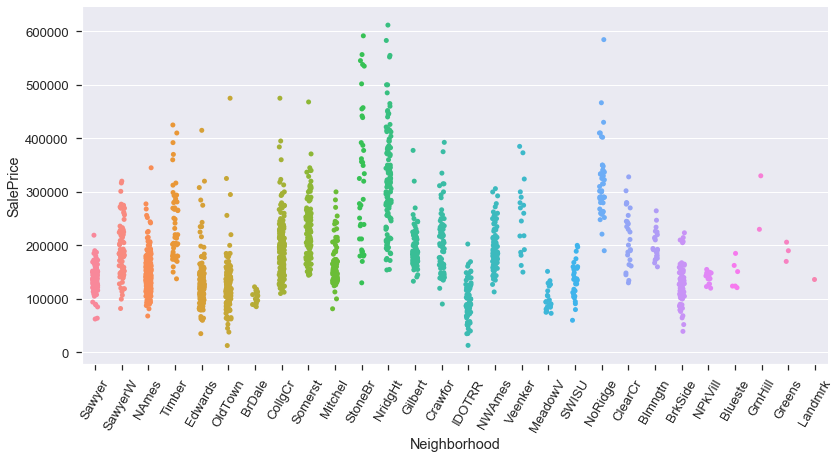

In [137]:
g = sns.catplot(x="Neighborhood", y="SalePrice", data=ames,
           height=6,
            aspect=2)
g.set_xticklabels(rotation=60);
g.tick_params(labelsize=10)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5});
g.axes.set_title("Neighborhoods stacking up to Price",fontsize=20)
g.set_xlabel("Neighborhood",fontsize=20)
g.set_ylabel("Sale Price",fontsize=20)
plt.tight_layout()
plt.show();

This is a count plot which is similar to a barplot, but according to Seaborn it estimates "counting the number of occurrences."

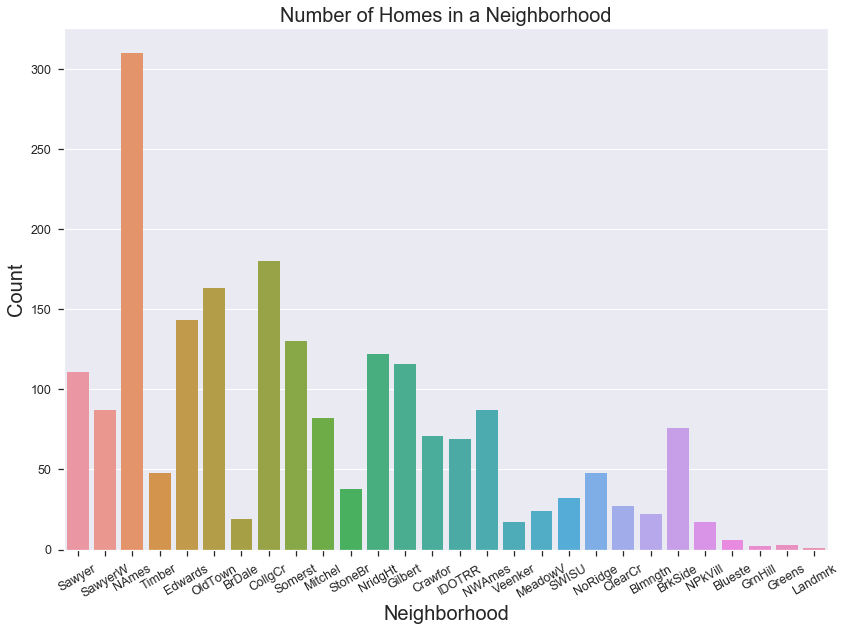

In [144]:
#fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)
plt.figure(figsize=(12,9))
g = sns.countplot(x='Neighborhood',data=ames)
# g.set_xticklabels(ax.get_xticklabels(), fontsize=7)
# plt.tight_layout()
# plt.show()
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.tick_params(labelsize=12.5)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.7});
g.axes.set_title("Number of Homes in a Neighborhood",fontsize=20)
g.set_xlabel("Neighborhood",fontsize=20)
g.set_ylabel("Count",fontsize=20)
plt.tight_layout()
plt.show();

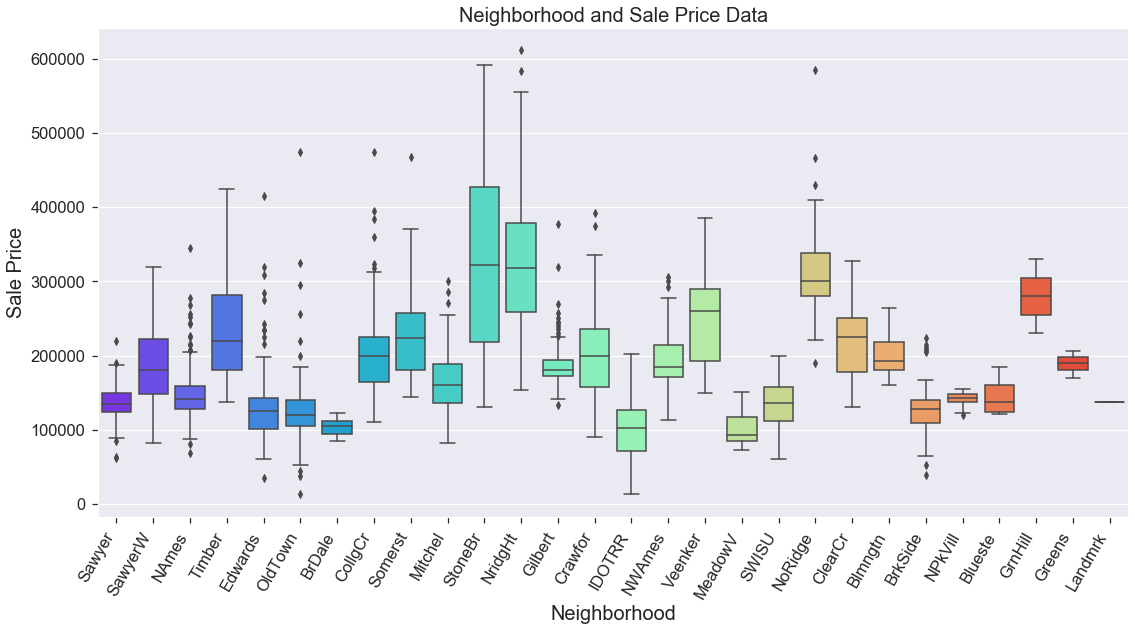

In [135]:
plt.figure(figsize=(16,9))
g = sns.boxplot(x='Neighborhood',y='SalePrice',data=ames,palette='rainbow')
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right")
g.axes.set_title("Neighborhood and Sale Price Data",fontsize=20)
g.set_xlabel("Neighborhood",fontsize=20)
g.set_ylabel("Sale Price",fontsize=20)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})
plt.tight_layout()
plt.show();

In [ ]:
Top two most expensive
'Neighborhood_NridgHt',
'Neighborhood_NoRidge'

Bottom two least expensive
'Neighborhood_NAmes'
'Neighborhood_OldTown'

In [ ]:
ames2['Neighborhood'].value_counts()

I original onehotencoded the Neighborhood series originally, but it actually gave order to the Neighborhoods, where there actually isn't one. So I decided to pd.get_dummies instead.
I used the .iloc[:, 1:] method to state that I would like all rows, and columns from the 1st to the end, since Python is 0-indexed, it drops the '0th' column. Then I added the new colomn on the DataFrame using pandas concat, and axis=1 means it's added on the columns

In [21]:
Neigh_Dummy = pd.get_dummies(ames2.Neighborhood, prefix='Neighborhood').iloc[:, 1:]

ames2 = pd.concat([ames2, Neigh_Dummy], axis=1)

In [22]:
ames2.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,533352170,60,RL,0.0,13517,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,No_FP,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,No_Pool,No_Fence,No_Misc,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,No_Pool,No_Fence,No_Misc,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Dropping the Neighborhood columns, now that I have my dummy variables.

In [23]:
ames2 = ames2.drop(['Neighborhood'], axis=1)

In [24]:
ames2.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,533352170,60,RL,0.0,13517,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,No_FP,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,No_Pool,No_Fence,No_Misc,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,No_Pool,No_Fence,No_Misc,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,No_FP,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,No_Pool,No_Fence,No_Misc,0,1,2010,WD,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,No_FP,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,No_Pool,No_Fence,No_Misc,0,4,2010,WD,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.0,14235,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,No_FP,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,No_Pool,No_Fence,No_Misc,0,3,2010,WD,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [145]:
ames2.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,1.000000,0.175478,0.026905,-0.014749,0.031633,-0.062876,-0.025888,-0.065010,-0.090613,-0.039066,-0.051540,0.000868,0.008181,-0.044247,-0.028082,-0.008099,0.011767,-0.027771,-0.033906,0.012924,-0.059439,-0.042625,0.011025,-0.002313,-0.011511,-0.038705,-0.038953,-0.050315,-0.047804,-0.010533,-0.001364,0.033915,-0.022751,0.009882,0.057847,-0.032705,0.127381,-0.975765,-0.051416,-0.027845,-0.029300,-0.009198,0.021498,0.095143,0.074140,0.055234,-0.070396,0.011039,0.040786,0.065378,0.034435,0.064076,0.043441,-0.035236,-0.064756,-0.046060,-0.012862,-0.079482,-0.001571,0.029736,0.015324,-0.074369,-0.052302,-0.012046,0.033858,0.015391
PID,0.175478,1.000000,-0.003235,-0.044055,0.018315,-0.269728,0.107443,-0.348677,-0.178039,-0.251441,-0.101313,-0.012998,-0.112402,-0.226646,-0.162620,-0.005949,0.072415,-0.124491,-0.033509,-0.003958,-0.180291,-0.165453,0.009548,0.068659,-0.090557,-0.124367,-0.153626,-0.230408,-0.207081,-0.043626,-0.087519,0.150647,-0.024588,-0.041763,-0.000529,-0.014021,-0.032532,0.008693,-0.255068,0.056322,-0.095365,0.141987,0.117572,0.318630,0.196986,0.279162,-0.241077,-0.036568,0.033613,0.192350,0.022705,0.121093,0.224068,-0.401763,-0.090161,-0.204546,-0.151278,-0.247103,0.196329,0.130254,0.077076,-0.030016,-0.252513,-0.135690,0.167154,-0.087427
MS SubClass,0.026905,-0.003235,1.000000,-0.219101,-0.249039,0.036962,-0.070360,0.036482,0.045333,-0.000179,-0.060378,-0.068257,-0.138867,-0.233426,-0.253614,0.305655,0.031055,0.073151,0.026158,-0.015507,0.142453,0.180062,-0.003955,0.252083,0.037081,-0.054580,-0.110765,-0.048802,-0.108031,0.003084,-0.017906,-0.039998,-0.030133,-0.038940,-0.005250,-0.019830,0.013693,-0.033134,-0.087331,0.113432,0.232618,-0.034005,-0.009962,-0.112099,0.015963,-0.005878,0.005180,0.056306,0.045963,0.013282,0.053131,0.263881,-0.008202,-0.175638,0.179724,-0.069866,-0.008832,0.010734,0.027368,0.044133,-0.081799,-0.000916,0.106902,0.094015,-0.081160,0.008866
Lot Frontage,-0.014749,-0.044055,-0.219101,1.000000,0.104860,0.103401,-0.030496,0.015057,0.054358,0.082413,0.006790,0.002757,0.149370,0.163828,0.198959,-0.019958,0.012195,0.139049,-0.002638,-0.022210,0.052188,-0.037649,0.099377,0.016314,0.170448,0.022557,0.001119,0.117418,0.157692,0.004322,0.077032,0.011190,0.008705,0.038583,0.047466,-0.005564,-0.000672,0.007805,0.185351,-0.050029,-0.108144,-0.035359,-0.059059,0.026135,-0.023947,0.002672,-0.070239,-0.020875,-0.055362,-0.002174,-0.039138,-0.114544,0.012789,0.084009,-0.089111,-0.024583,0.040082,0.203496,0.024374,-0.004723,-0.082422,0.019262,-0.001605,-0.017059,0.013281,-0.016550
Lot Area,0.031633,0.018315,-0.249039,0.104860,1.000000,0.091621,-0.016461,0.029388,0.044804,0.143165,0.166319,0.044453,0.040815,0.231147,0.348123,0.025898,0.001962,0.294542,0.101550,0.022797,0.123522,0.043360,0.143438,-0.012509,0.219947,0.276997,0.085989,0.214817,0.246172,0.148014,0.116701,0.016749,0.020589,0.070890,0.070138,0.042710,0.007863,-0.029471,0.303744,-0.062462,-0.120462,-0.089335,0.323803,0.009517,0.047116,-0.005939

In [ ]:
#I also created an amesint so instead of dropping columns I can just create a new df to see columns I am specifically
#interested in

In [146]:
amesint = ames2[['Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Area', 'SalePrice']]

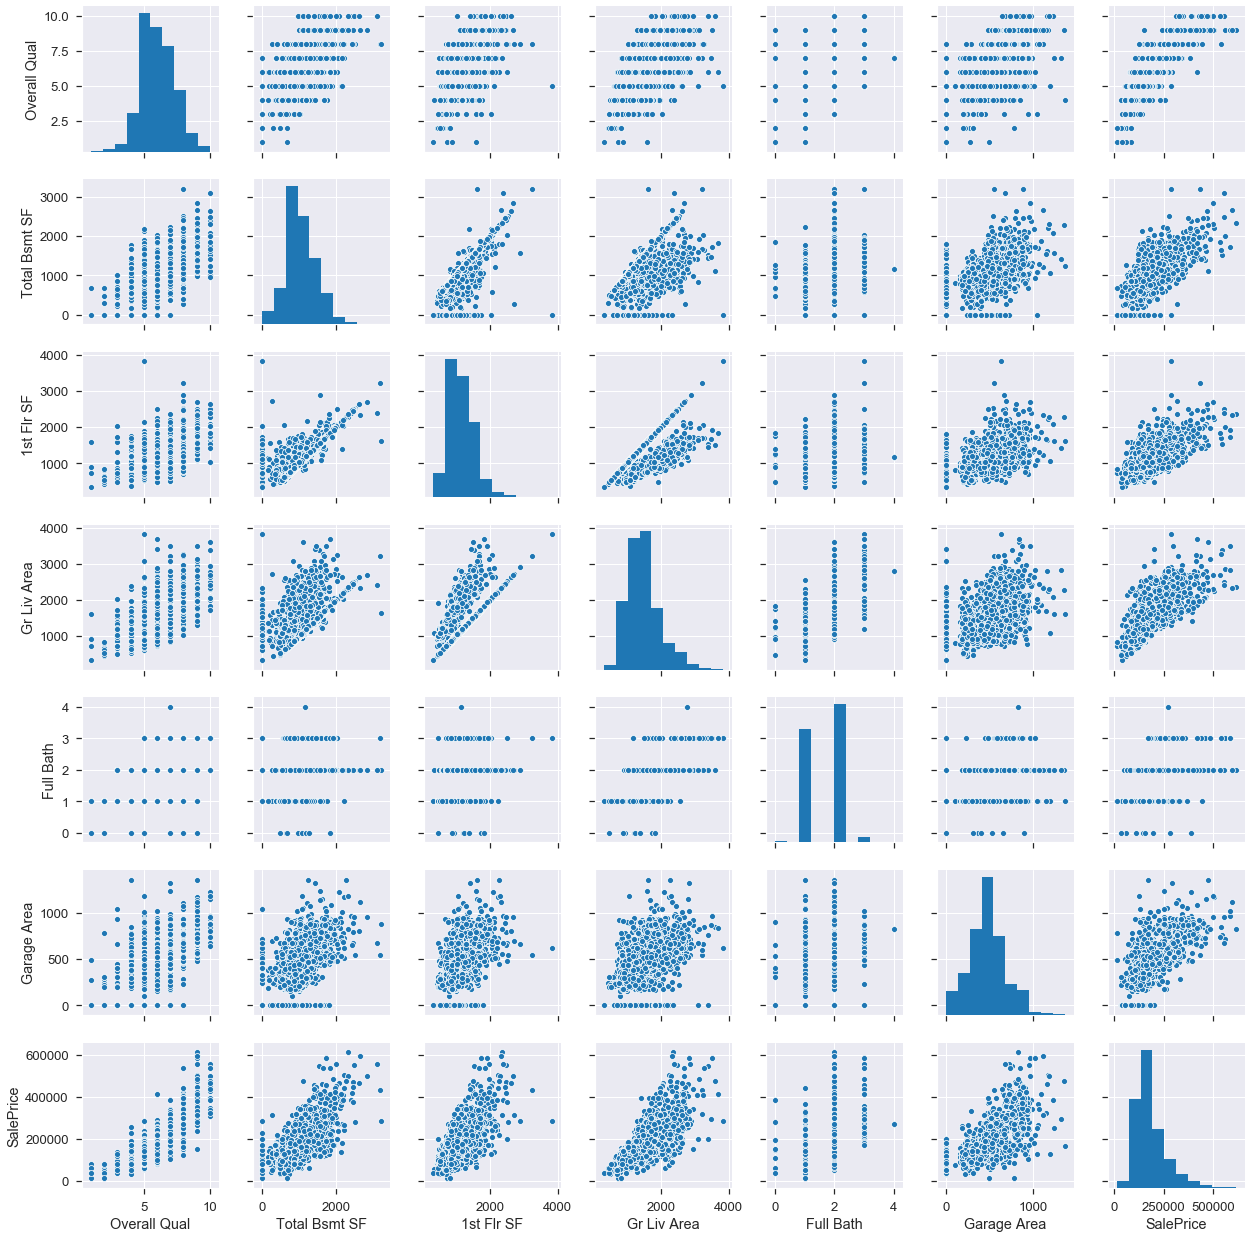

In [148]:
sns.pairplot(amesint)

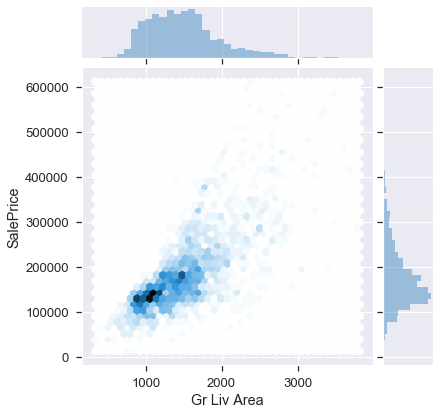

In [149]:
sns.jointplot("Gr Liv Area", "SalePrice", data=amesint, kind = 'hex')

In [150]:
amesint['Mean_Yhat'] = np.mean(amesint['SalePrice'])

C:\Users\Vera\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
#my baseline/Naive Prediction is 181469.70, which is what I want to score above

#creating a function for our MSE
def MSE(y_true, y_hat):
    diff = y_true - y_hat
    squared_diff = diff**2
    return np.mean(squared_diff)

In [152]:
#calculating MSE of baseline prediction
MSE(amesint['SalePrice'], amesint['Mean_Yhat'])

6284773122.026522

In [153]:
def line_of_best_fit(x, y):
    y_bar = y.mean()
    x_bar = x.mean()
    std_y = y.std()
    std_x = x.std()
    r_xy = np.corrcoef(x, y)[0][1]
    
    beta_1 = r_xy * (std_y / std_x)
    beta_0 = y_bar - beta_1 * x_bar
    
    return beta_0 + beta_1 * x

In [154]:
#calculating the line of best fit
amesint['Linear_Yhat'] = line_of_best_fit(amesint['Gr Liv Area'], amesint['SalePrice'])

C:\Users\Vera\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


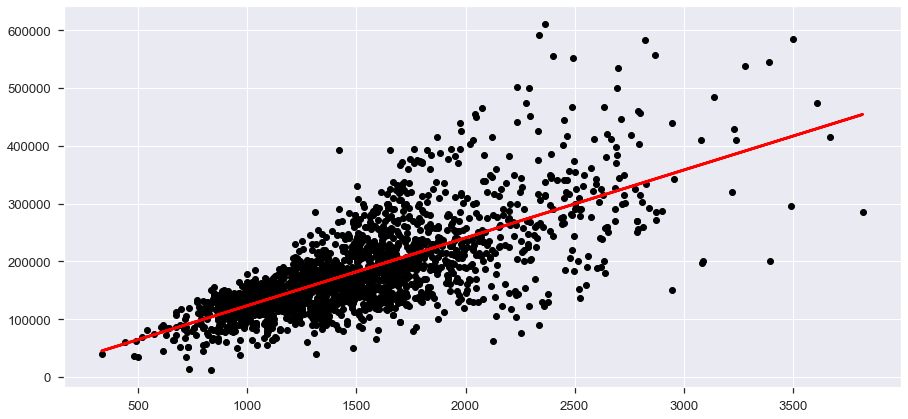

In [155]:
#plotting the line of best fit (our linear regression) to fit for Ground Living Area and Sale price
plt.figure(figsize=(15, 7))

plt.scatter(amesint['Gr Liv Area'], amesint['SalePrice'], color = 'black')

plt.plot(amesint['Gr Liv Area'], amesint['Linear_Yhat'],
        color='red')

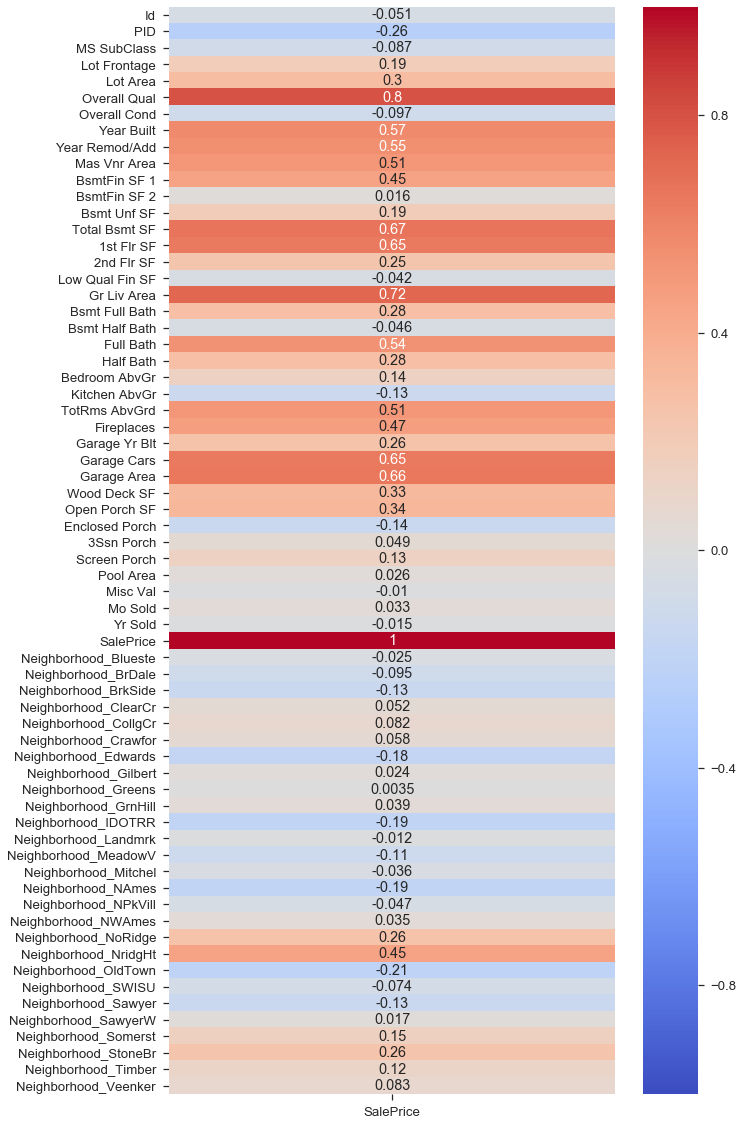

In [136]:
plt.figure(figsize=(10,20))
sns.heatmap(ames2.corr()[['SalePrice']],
           cmap='coolwarm',
           vmin=-1,
           vmax=1,
           annot=True)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5});
#this is from github mwaskon seaborn issues 1773, becuase my top and bottom cells are cut in half
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t);

SalePrice will be predictor

02_Preprocessing_and_Feature_Engineering

I am creating a heatmap for the different neighborhoods to see what top 5 and btoom 5 features were the most relevant in the top 2 and bottom 2 neighborhoods.

I dropped my unneccesary neighborshoods that I will not be using in my project

In [ ]:
ames2 = ames2.drop(['Neighborhood_Veenker', 'Neighborhood_Timber', 'Neighborhood_StoneBr', 'Neighborhood_Somerst', 'Neighborhood_SawyerW', 'Land Contour',
                    'Neighborhood_Sawyer', 'Neighborhood_SWISU', 'Neighborhood_NWAmes', 'Neighborhood_NPkVill','Neighborhood_Mitchel',
                    'Neighborhood_MeadowV', 'Neighborhood_Landmrk', 'Neighborhood_IDOTRR', 'Neighborhood_GrnHill',
                    'Neighborhood_Greens', 'Neighborhood_Gilbert', 'Neighborhood_Edwards', 'Neighborhood_Crawfor',
                    'Neighborhood_CollgCr', 'Neighborhood_ClearCr', 'Neighborhood_BrkSide', 'Neighborhood_BrDale',
                    'Neighborhood_Blueste'], axis=1)

In [ ]:
#I did this for each of the neighborhoods I selected, 'Neighborhood_NridgHt', 'Neighborhood_NoRidge',
#'Neighborhood_OldTown', 'Neighborhood_NAmes'
#plt.figure(figsize=(10,20))
#sns.heatmap(ames2.corr()[['Neighborhood_NridgHt']],
#           cmap='coolwarm',
#           vmin=-1,
#           vmax=1,
#           annot=True);
#this is from github mwaskon seaborn issues 1773, becuase my top and bottom cells are cut in half
#b, t = plt.ylim()
#b += 0.5
#t -= 0.5
#plt.ylim(b, t);

In [ ]:
#sns.set(font_scale=3)

- Top two most expensive:
   - 'Neighborhood_NridgHt',
   - 'Neighborhood_NoRidge'

- Bottom two least expensive
   - 'Neighborhood_NAmes'
   - 'Neighborhood_OldTown'


- Nridght
  -  Top(Besides Sale price @ 45%)            Bottom besides pid at -25%
  -  Overall Qual - 38%                       Overall Cond - (-13%)
  -  Mas Vnr Area - 34%                       Enclosed Porch- (-9.5%)
  -  Total Bsmt Sqft - 34%                    Kitchen abv gr - (-5.1%)
  -  Garage Area 33%                          Bsmt .5 bath - (-6.3%)
  -  Garage Cars - 31%                        Bsmt Fin 2 - (-5.4%)

- NoRidge
  -  Top(besides sale price, 2nd 26%)         Bottom
  -  Gr Liv Area - 31%                        Overall cond - (-5.3%)
  -  2nd Floor Sqft - 24%                     Bsmt .5 bath - (-3.9%)
  -  Mass Vrn Area - 24%                      Kitch Abv Fr - (-3.2%)
  -  Top Rms Abv Gr - 21%                     Low Qual Fin Sf - (-1.7%)
  -  Overall Qual - 19%                       3Ssn Porch - (-1.6%)

- OldTown
  -  Top(besides pid at 20%)                  Bottom(bsides sale price,2nd at -21%)
  -  Enclosed Porch - 24%                     Yr Built - (-47%)
  -  Overall Cond - 18%                       Total Bsmt Sqft - (-18%)
  -  Low Qual Fin Sqft - 11%                  Overall Qual - (-18%)
  -  2nd flr sqft - 9.6%                      1st flr sqft - (-17%)
  -  Kitc abv gr - 7.7%                       Yr remod add & Garage Cars - (-16%)

- NAmes
   - Top                                      Bottom(besides pid 40%)
   - Overall Cond - 9.2%                      Yr Remod Add - (-29%)
   - Bsmt Fin sqft 2 - 8.4%                   Full Bath - (-26%)
   - Lot Frontage - 8.4%                      Overall Qual - (-23%)
   - Screenporch - 8.3%                       2nd flor sqft - (-22%)
   - Bsmt fin sqft 1 - 4.6%                   Gr Liv Area - (-19%)

In [46]:
ames2.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,533352170,60,RL,0.0,13517,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,No_FP,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,No_Pool,No_Fence,No_Misc,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,No_Pool,No_Fence,No_Misc,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Feature Selection
Creating a features column with all the neighborhoods and the top 5 features from the top 2 neighborhoods and bottom 2.
I am interested in further exploring the Series I have selected by creating a features matrix and comparing it to my target vector
I took out 'Neighborhood_Landmrk' and 'Neighborhood_GrnHill' because they are not in the testing data we recieved and I would like to use the features to predict prices as well. And I need to use the same features as on the model that I trained.

In [101]:
features = ['Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_NAmes', 'Overall Qual',
            'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area', 'Garage Cars', 'Overall Cond', 'Enclosed Porch',
            'Kitchen AbvGr', 'Gr Liv Area', '2nd Flr SF', 'TotRms AbvGrd', 'Low Qual Fin SF', 'Full Bath',
            'Lot Frontage', 'Screen Porch', 'BsmtFin SF 1', 'Neighborhood_Veenker', 'Neighborhood_Timber',
            'Neighborhood_StoneBr', 'Neighborhood_Somerst', 'Neighborhood_SawyerW', 'Neighborhood_Sawyer',
            'Neighborhood_SWISU', 'Neighborhood_NWAmes', 'Neighborhood_NPkVill','Neighborhood_Mitchel',
            'Neighborhood_MeadowV', 'Neighborhood_IDOTRR', 'Neighborhood_Greens', 'Neighborhood_Gilbert',
            'Neighborhood_Edwards', 'Neighborhood_Crawfor', 'Neighborhood_CollgCr', 'Neighborhood_ClearCr',
            'Neighborhood_BrkSide', 'Neighborhood_BrDale', 'Neighborhood_Blueste']
X = ames2[features]
y = ames2['SalePrice']

In [102]:
X.head()

,Neighborhood_NridgHt,Neighborhood_NoRidge,Neighborhood_OldTown,Neighborhood_NAmes,Overall Qual,Mas Vnr Area,Total Bsmt SF,Garage Area,Garage Cars,Overall Cond,Enclosed Porch,Kitchen AbvGr,Gr Liv Area,2nd Flr SF,TotRms AbvGrd,Low Qual Fin SF,Full Bath,Lot Frontage,Screen Porch,BsmtFin SF 1,Neighborhood_Veenker,Neighborhood_Timber,Neighborhood_StoneBr,Neighborhood_Somerst,Neighborhood_SawyerW,Neighborhood_Sawyer,Neighborhood_SWISU,Neighborhood_NWAmes,Neighborhood_NPkVill,Neighborhood_Mitchel,Neighborhood_MeadowV,Neighborhood_IDOTRR,Neighborhood_Greens,Neighborhood_Gilbert,Neighborhood_Edwards,Neighborhood_Crawfor,Neighborhood_CollgCr,Neighborhood_ClearCr,Neighborhood_BrkSide,Neighborhood_BrDale,Neighborhood_Blueste
0,0,0,0,0,6,289.0,725.0,475.0,2.0,8,0,1,1479,754,6,0,2,0.0,0,533.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,7,132.0,913.0,559.0,2.0,5,0,1,2122,1209,8,0,2,43.0,0,637.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,5,0.0,1057.0,246.0,1.0,7,0,1,1057,0,5,0,1,68.0,0,731.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,5,0.0,384.0,400.0,2.0,5,0,1,1444,700,7,0,2,73.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,6,0.0,676.0,484.0,2.0,8,0,1,1445,614,6,0,2,82.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#So now I have my Neighborhood columns as a numeric type and my Overall Quality column reduced to 3 bins

In [ ]:
#creating interaction terms between
# ames3['NeighQual'] = ames3['Neighborhood'] * ames3['Qual Bins']
# ames3.head()
#should ic reate interaction terms?
#is it good to create interaction terms after creating bins? for ex a 10 would probably be much stronger than a 3

In [ ]:
#because of the way the chart turned out it would be a good idea to bin the Overall Qual. This is a categorical column
#and I could bin let say 8,9,10 in high quality, 0,1,2,3 in low quality, and 4,5,6,7 into medium quality
#does it affect the outcome the high quality has one less than low and med.
#also does my catgorical have to change to 2 options to change to a linear to use classif.

Here I did the train test split, where I am splitting my training data into my testing data in order to see how well my model will predict the sales price based on the features I selected

In [103]:
#here I should train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [104]:
#instantiating
linreg = LinearRegression()

In [105]:
#fit my model to my training data
linreg.fit(X_train, y_train) #fitting the model to my data these will be the parameters.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
#This is my R2 score
cross_val_score(linreg, X_train, y_train, cv=5).mean()

0.862429982808765

In [ ]:
#My r2 score is telling me that about 49% of the data I have choosen will predict my y variance?

In [107]:
linreg.score(X_train, y_train)

0.8766673787070762

In [108]:
linreg.score(X_test, y_test)

0.8940132946939674

In [ ]:
#my model pre

In [ ]:
y_pred = linreg.predict(X_test)

In [85]:
#mean_squared_error(y, y_pred)
#MSE of baseline was 6278872217.837828

In [86]:
#This is my RMSE score, which is the squared score of the MSE.
#np.sqrt(metrics.mean_squared_error(y, y_pred))

In [110]:
#this is where my line of best fit is when x is 0, it turn outs to be a negative number, so it does not tell us much in the
#context of what we are looking for, this is also my B0 value
linreg.intercept_

-49112.94280537905

In [111]:
linreg.coef_

array([ 3.46122441e+04,  1.62318981e+04, -3.26235455e+04, -2.57115929e+04,
        1.37461715e+04,  2.78512580e+01,  1.70020284e+01,  2.73695097e+01,
        1.54465871e+03,  5.12329514e+03, -2.34515011e+01, -2.15381650e+04,
        6.10225218e+01, -1.24900657e+01,  1.57045175e+03, -3.72151818e+01,
        9.07968905e+02,  8.79883680e+01,  6.39041573e+01,  2.65212185e+01,
       -1.23532278e+04,  3.33585789e+03,  4.96218659e+04,  5.44339504e+03,
       -1.46272668e+04, -1.89227605e+04, -3.06643884e+04, -3.30670796e+04,
       -3.08094524e+04, -1.40467423e+04, -2.70793617e+04, -2.67930785e+04,
       -2.47960347e+04, -6.70819969e+02, -2.12925056e+04, -2.98838628e+03,
       -3.67738906e+03,  5.98006681e+03, -2.06176774e+04, -3.93950334e+04,
       -2.11554377e+04])

In [112]:
#these will create the predictions based on my features and model
predictions = linreg.predict(X_test)


In [113]:
pd.DataFrame(list(zip(features, linreg.coef_)), columns=['features', 'SalePrice'])

,features,SalePrice
0,Neighborhood_NridgHt,34612.244115
1,Neighborhood_NoRidge,16231.898084
2,Neighborhood_OldTown,-32623.545516
3,Neighborhood_NAmes,-25711.592938
4,Overall Qual,13746.171471
5,Mas Vnr Area,27.851258
6,Total Bsmt SF,17.002028
7,Garage Area,27.369510
8,Garage Cars,1544.658711
9,Overall Cond,5123.295145


In [114]:
residual = predictions - y_test
residual

1974     -5881.444555
694     -30503.213932
906       3106.053717
544       2195.332904
1847     -6136.580336
1566    -17565.041920
1572     15555.854840
944      24393.905460
818     -15238.063901
829     -21014.596020
1573     -8473.469278
979      34655.746911
1575     27644.002566
785       7323.416829
70      -90725.241953
1007    -32088.769325
188       -868.649793
1603      7206.489282
1270     22934.310067
1305     17704.232637
1321       394.645265
1112      3703.778955
1640       248.295511
1236    -12979.315737
599      -4696.809342
56       19262.123191
1074    -10126.916234
1264    -13612.434210
765      10536.407337
2003    -13783.078522
1520     -3451.240348
582      41870.421995
712       5990.738465
1806     27438.068046
383       7466.607035
1924     22489.871064
212     -19599.393159
382      50250.743196
486      -8265.459628
1718    -17171.164870
534      78309.199678
1553    -14854.393791
124       4416.858733
874      -4224.891614
552      -9446.904412
29      -1

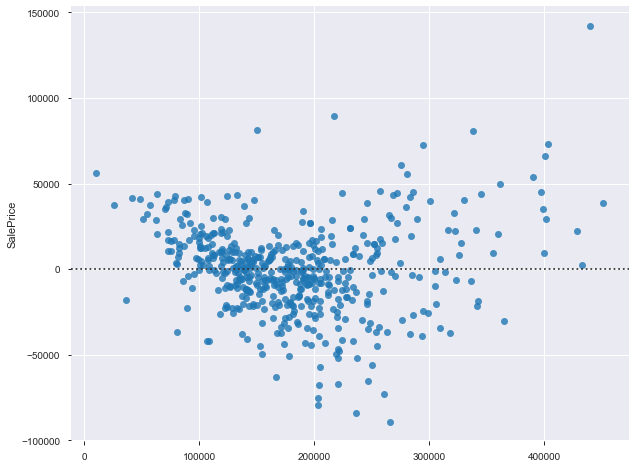

In [115]:
plt.figure(figsize=(10, 8))
sns.residplot(predictions, y_test);

In [116]:
amests = pd.read_csv("./datasets/test.csv")

In [117]:
amests.tail(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,616,Unf,0,248,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1974.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2007,WD
877,1939,535327160,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,BLQ,793,Unf,0,130,923,GasA,TA,Y,SBrkr,925,0,0,925,1,0,1,0,3,1,TA,5,Typ,2,TA,Attchd,1955.0,Unf,1,390,TA,TA,Y,81,0,0,0,0,0,NaN,GdWo,NaN,0,3,2007,WD


I preformed the same eda as I did with the original testing data where I replaced the missing data and then dummied the Neighborhoods coloumn. I selected the same features as I did in my training data to produce the results below.
Here when I filled 'NA' or 'None' it filled it in as a string, but I would need to change it if I wanted to export the DataFrame and read it in somewhere else.

In [118]:
amests['Lot Frontage'].fillna(0.0, inplace=True)
amests['Alley'].fillna('NA', inplace=True)
amests['Mas Vnr Area'].fillna(0.0, inplace=True)
amests['Mas Vnr Type'].fillna('None', inplace=True)
amests['Bsmt Qual'].fillna('NA', inplace=True)
amests['Bsmt Cond'].fillna('NA', inplace=True)
amests['Bsmt Exposure'].fillna('NA', inplace=True)
amests['BsmtFin Type 1'].fillna('NA', inplace=True)
amests['BsmtFin Type 2'].fillna('NA', inplace=True)
amests['Garage Finish'].fillna('NA', inplace=True)
amests['Garage Qual'].fillna('NA', inplace=True)
amests['Garage Cond'].fillna('NA', inplace=True)
amests['Pool QC'].fillna('NA', inplace=True)
amests['Fence'].fillna('NA', inplace=True)
amests['Misc Feature'].fillna('NA', inplace=True)
amests['Electrical'].fillna('NA', inplace=True)
amests['Fireplace Qu'].fillna('NA', inplace=True)
amests['Garage Type'].fillna('NA', inplace=True)
amests['Garage Yr Blt'].fillna(0000.0, inplace=True)

In [119]:
Neigh_Dummy2 = pd.get_dummies(amests.Neighborhood, prefix='Neighborhood').iloc[:, 1:]

amests = pd.concat([amests, Neigh_Dummy2], axis=1)

In [120]:
amests = amests.drop(['Neighborhood'], axis=1)

In [121]:
features2 = ['Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_NAmes', 'Overall Qual',
            'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area', 'Garage Cars', 'Overall Cond', 'Enclosed Porch',
            'Kitchen AbvGr', 'Gr Liv Area', '2nd Flr SF', 'TotRms AbvGrd', 'Low Qual Fin SF', 'Full Bath',
            'Lot Frontage', 'Screen Porch', 'BsmtFin SF 1', 'Neighborhood_Veenker', 'Neighborhood_Timber',
            'Neighborhood_StoneBr', 'Neighborhood_Somerst', 'Neighborhood_SawyerW', 'Neighborhood_Sawyer',
            'Neighborhood_SWISU', 'Neighborhood_NWAmes', 'Neighborhood_NPkVill','Neighborhood_Mitchel',
            'Neighborhood_MeadowV', 'Neighborhood_IDOTRR', 'Neighborhood_Greens', 'Neighborhood_Gilbert',
            'Neighborhood_Edwards', 'Neighborhood_Crawfor', 'Neighborhood_CollgCr', 'Neighborhood_ClearCr',
            'Neighborhood_BrkSide', 'Neighborhood_BrDale', 'Neighborhood_Blueste']
X2 = amests[features2]

In [123]:
y_pred2 = linreg.predict(X2)

In [124]:
submission1 = pd.DataFrame(y_pred2, columns=['SalePrice'])

In [125]:
test_ID = amests['Id']

In [126]:

sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred2
sub.to_csv('submission4.csv',index=False)

In [127]:
sub.to_csv('./datasets/sub4.csv', index=False)

In [156]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 2 columns):
Id           878 non-null int64
SalePrice    878 non-null float64
dtypes: float64(1), int64(1)
memory usage: 13.8 KB


In [158]:

sub.head(10)

,Id,SalePrice
0,2658,153886.071499
1,2718,168070.383246
2,2414,189888.941815
3,1989,97674.875124
4,625,182837.903527
5,333,83370.776790
6,1327,87232.272950
7,858,151600.717815
8,95,192081.277115
9,1568,177774.153418
